# Homework 1: Setup & Rounding Error
Physics 177, Spring 2017  (Prof. Tanedo)  
**Due**: Tuesday, April 18

Ugne Dargyte 

## Discussion

Feel free to use whatever resources you need to get up to speed with the tools (Python, Jupyter, GitHub). You are encouraged to work with other students, especially for technical set up. Please note the following:
* While you are free to discuss the problems, every line of code you type should be your own and *not* copied-and-pasted from anyone else. You should write your code without referring to anyone else.
* We will penalize plagiarism harshly.


## 1. Getting Set Up

Set up **Python** on your system. Version 3.6 is preferred, but we shouldn't have any major problems if you're using an earlier 3.x version or 2.7.

You are also responsible for setting up the **Jupyter** notebook (formerly iPython) environment. 

Sign up for a free **GitHub** account. The account should be associated with your UCR e-mail address. (You may also use an existing account.) All work for this course will be completed in Jupyter notebooks and submitted to GitHub. 
- I strongly suggest that you use a professional username. Your GitHub account is a de-facto resume/CV when you apply for jobs (both academic and industry).
- I also suggest uploading a photo to help us learn your names.

**Important**: send an e-mail to Prof. Tanedo and Corey Kownacki (TA). The subject of the e-mail should be *P177: Homework 1* and you should clearly indicate your GitHub username and the URL to your GitHub account. 


## 2. Cloning this notebook

Homework, like this one, will be posted to the course GitHub:  
https://github.com/orgs/Physics177-2017/  

For those already familiar with GitHub, you can go ahead and fork a copy of this notebook. The instructions below are the "round-about" way of doing things.

1. Download ("clone") this notebook to your own computer.

2. Open your local copy of this notebook.

3. Go to the top cell of this notebook and replace "**Your Name**" with your actual name. *Remark*: the anime film *Your Name* was recently released in US theaters. As of this writing, it has a 79% score on Metacritic.

4. Save this notebook

5. Create a new repository on GitHub called **P177_Homework01**. Initialize it with a **README.md** file, where you can briefly explain that this is Homework 1. Feel free to add any other comments in the README that you think are appropriate.

6. Upload your local copy of this notebook to this repository. Be sure to write a brief note under **Commit changes**. Say something like "initial upload."

7. Make sure that the copy of your homework in your repository actually has your name on top. If not, troubleshoot.

## 3. Markdown Practice

For this problem, I'd like you **create a markdown cell** just below this one and explore the markdown syntax. Use *Insert* > *Insert Cell Below* from this cell.

Here's one useful reference:
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

I'd like you to include the following in this new cell:
1. Create a subheading (using two hashtags) 
2. Create a list
3. Use **boldface** and *italics*
4. Your favorite equation, written in $\LaTeX$
5. Embed a YouTube trailer of the film *Your Name*. For this you may want to refer to http://stackoverflow.com/a/27315283. 

# This is a header

1. First Item
2. Second Item
3. ???
4. Profit.

**boldface**
*italics*
$$N(t) = N_0exp(-t/\tau_\mu)+B$$

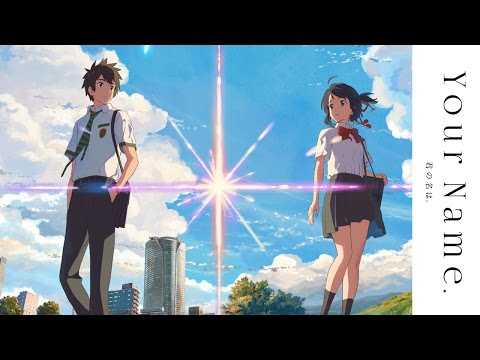

In [2]:
from IPython.display import YouTubeVideo
# Trailer for Your Name
YouTubeVideo('xU47nhruN-Q')

## 4. Simpson's Rule
In class we built a simple Riemann sum integrator. The code that we wrote together is posted here:
https://github.com/Physics177-2017/Lec03-Rounding-Error

In this problem, please perform the *same* analysis on the *same* test function using **Simpson's rule**. 

What's that? Well, you'll have to read a little about it. You can find a discussion in section 5.1.2 of the course textbook (Newman, *Computational Physics*, 2nd ed.). For those who do not have a copy, you can find a discussion in Chapter 3 of Stickler's *Basic concepts in computational physics*, which is available electronically through the UCR library here: http://scotty.ucr.edu/record=b5077839~S5 (click on "Connect to: SpringerLink")

Create a cell below this one and do the following:
1. Create an "integrator" function that takes in a function and a spacing, $\Delta x$, and outputs the integral of that function from 0 .to 1 using Simpson's rule.

2. Use the same test function that we did in lecture: $$f(x) = 3.0\times 10^{-10} x^2.$$

3. Find the error on your algorithm (compared to the exact result) for $\Delta x$ of $10^{-1}, \cdots, 10^{-7}$.

4. Compare this to the errors that we found using the Riemann sum. Are they better? Worse? What happens as we approach the "$10^{-16}$" numerical precision?

In [20]:
def integrator(f,deltax):
    """This function integrates from 0 to 1"""
    even = deltax 
    odd = 0.0
    totalodd = 0.0
    totaleven = 0.0
    total = 0.0
    while (odd < 1):
        totalodd = totalodd + f(odd)
        odd = odd + 2 * deltax 
    while (even < 1):
        totaleven= totaleven + f(even)
        even = even + 2 * deltax
    total = 1/3 * (4* totalodd + 2*totaleven) * deltax
    return total 

In [21]:
def f(x):
    return 3*(10**-10)*x**2

In [22]:
f(1)

3e-10

In [23]:
integrator(f,0.1)

8.1e-11

In [27]:
someDeltaxs=[]
for i in range(1,8):
    someDeltaxs.append(10**-i)

In [45]:
someDeltaxs

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]

In [46]:
def intError(deltax):
    """gives the errror"""
    return 10**-10 - integrator(f,deltax)

In [47]:
intError(.1)

1.9e-11

In [49]:
list(map(intError,someDeltaxs))

[1.9e-11,
 1.989999999999946e-12,
 1.9989999999987437e-13,
 -2.0000999987589956e-14,
 1.9999898824867416e-15,
 -1.999985538030767e-16,
 1.9994862845125135e-17]

Errors in Out[49] vary between positive and negative errors. The errors actually seem to be larger for Simposon's rule, which is not expected. The source may lay in an error in the initial code of calculating Simpson's Rule (In[20]). 

## 5. Thinking about rounding errors

In your own words, explain what's happening in the following cell:

In [8]:
0.1+0.1+0.1 == .3

False

In a new cell below this one, explain why the above result is not suprising. What happens if you sum $0.1+0.1$ and compare it to $0.2$? Explain this.

The error lays in the floating number math. This is because floating numbers are represented as base 2 (binary) fractions. As a 
reslt, the binary numbers are stored as fractions in the most optimal way. Some fractions, however, are not exact and there 
come with a certain uncertainty. Therefore, 0.1 + 0.1 + 0.1 /= 0.3 because each floating decimal has an uncertainty that we do
not see. 

## X1. [Extra Credit] 

INSPIRE is a database of papers in high-energy physics, you can find it here: http://inspirehep.net

Write a script in Jupyter that takes a string and opens up a web browser with an INSPIRE search for that string.